# Schwarshild coordinates Einstein Tensor calculations using Symbolic module

In [5]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Use plain coordinates. 



![alt-text](img/schwarschild.png "Schwarschild coords")


In [8]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
# time vary the mass
a = 2*M*(sin(w*syms[0])**2)

#a = 2*M
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


⎡       2                                              ⎤
⎢2⋅M⋅sin (t⋅w)                                         ⎥
⎢───────────── - 1           0           0       0     ⎥
⎢      r                                               ⎥
⎢                                                      ⎥
⎢                            1                         ⎥
⎢        0          ───────────────────  0       0     ⎥
⎢                            2                         ⎥
⎢                     2⋅M⋅sin (t⋅w)                    ⎥
⎢                   - ───────────── + 1                ⎥
⎢                           r                          ⎥
⎢                                                      ⎥
⎢                                         2            ⎥
⎢        0                   0           r       0     ⎥
⎢                                                      ⎥
⎢                                             2    2   ⎥
⎣        0                   0           0   r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [9]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                             2⋅M⋅w⋅sin(2⋅t⋅w)                                                                                                                              
⎢           0             ───────────────────────                                  0                                                                      0                 
⎢                           ⎛         2         ⎞                                                                                                                           
⎢                         r⋅⎝- 2⋅M⋅sin (t⋅w) + r⎠                                                                                                                           
⎢                                                                                                                                                                           
⎢    2⋅M⋅w⋅sin(2⋅t⋅w)                                                                                                                  

In [10]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡     2 ⎛                      ⎛       2         ⎞           ⎞                                                                       ⎤
⎢2⋅M⋅w ⋅⎝-M⋅(1 - cos(4⋅t⋅w)) + ⎝2⋅M⋅sin (t⋅w) - r⎠⋅cos(2⋅t⋅w)⎠                          2⋅M⋅w⋅sin(2⋅t⋅w)                             ⎥
⎢─────────────────────────────────────────────────────────────                      ───────────────────────                      0  0⎥
⎢                                         2                                           ⎛         2         ⎞                          ⎥
⎢                    ⎛         2         ⎞                                          r⋅⎝- 2⋅M⋅sin (t⋅w) + r⎠                          ⎥
⎢                    ⎝- 2⋅M⋅sin (t⋅w) + r⎠                                                                                           ⎥
⎢                                                                                                                                    ⎥
⎢                                                      

#Zero like it should be 


In [21]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                                                           
⎢                                                                                                                                                                           
⎢                      ⎡0                                                                           0                                                                       
⎢                      ⎢                                                                                                                                                    
⎢                      ⎢       ⎛     3    8            2      6             4  2    4             4  2    2             2    4           5  2    2         5  2    3    2   
⎢                      ⎢   2⋅M⋅⎝- 8⋅M ⋅sin (t⋅w) + 12⋅M ⋅r⋅sin (t⋅w) - 4⋅M⋅r ⋅w ⋅sin (t⋅w) + 6⋅M⋅r ⋅w ⋅sin (t⋅w) - 6⋅M⋅r ⋅sin (t⋅w) - 2

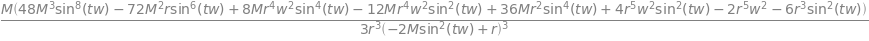

In [22]:
weyl[0,1,0,1]

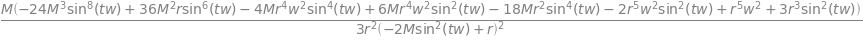

In [23]:
weyl[0,2,0,2]

(t, r, theta, phi, M, w)


Text(0.5, 1.0, 'T_01')

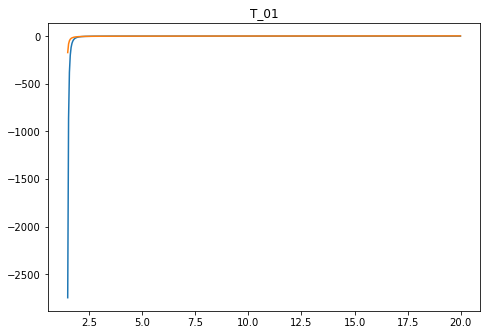

In [25]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


